In [1]:
import librosa
import librosa.display as librosa_display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
df = pd.read_csv('./bird_songs_metadata.csv')
df

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-8.wav
5418,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-10.wav
5419,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-14.wav
5420,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-15.wav


In [3]:
df = df[['id', 'species', 'filename']]
df = df[df['filename'].str.contains('-0')]
df

,id,species,filename
0,557838,bewickii,557838-0.wav
11,544036,bewickii,544036-0.wav
24,493957,bewickii,493957-0.wav
33,486798,bewickii,486798-0.wav
42,480035,bewickii,480035-0.wav
...,...,...,...
5361,18125,cardinalis,18125-0.wav
5370,13164,cardinalis,13164-0.wav
5382,12876,cardinalis,12876-0.wav
5395,11846,cardinalis,11846-0.wav


In [4]:
files = list(df['filename'])
speechs = []
for file in files:
    wave, sample_rate = librosa.load('./wavfiles/' + file)
    speechs.append(torch.Tensor(wave))

In [5]:
def make_mels(audio: torch.Tensor) -> torch.Tensor:
    res = librosa.feature.chroma_cens(audio.numpy())
    trc = torch.from_numpy(res)
    return torch.reshape(trc, (-1, ))

mels = [make_mels(audio) for audio in speechs]

c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [6]:
print([t.size() for t in mels])

[torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]),

In [7]:
import umap.umap_ as umap

embs = umap.UMAP().fit_transform(torch.stack(mels))

In [8]:
def split(sp):
    res = []
    for i in range(0, len(sp)):
        if (sp[i] == 'bewickii'):
            res.append('red')
        elif (sp[i] == 'cardinalis'):
            res.append('green')
        elif (sp[i] == 'polyglottos'):
            res.append('black')
        elif (sp[i] == 'melodia'):
            res.append('yellow')
        else:
            res.append('blue')
    return res    

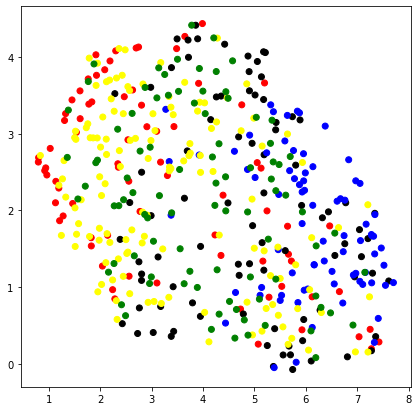

In [9]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.scatter(embs[:, 0], embs[:, 1], color=split(list(df['species'])))
plt.show()

Text(0.5, 1.0, '5 clusters')

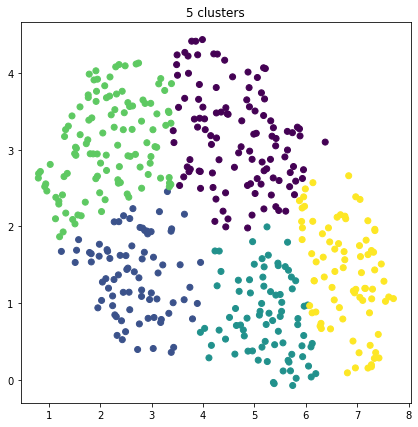

In [10]:
from sklearn.cluster import KMeans

y_pred_5 = KMeans(n_clusters=5).fit_predict(embs)

plt.scatter(embs[:, 0], embs[:, 1], c=y_pred_5)
plt.title("5 clusters")

In [11]:
import tqdm

def get_most_similar(file, files):
  wave, sample_rate = librosa.load('./wavfiles/' + file)
  vec = make_mels(torch.Tensor(wave)).numpy()
  files = list(df['filename'])

  ans = ''
  mx = -100
  for file_i in files:
    wave_i, sample_rate = librosa.load('./wavfiles/' + file_i)
    word_vec = make_mels(torch.Tensor(wave_i)).numpy()
    result = np.dot(vec, word_vec) / (np.linalg.norm(vec) * np.linalg.norm(word_vec))  
    if result > mx and file_i != file:
      mx = result
      ans = file_i
  return ans   

In [12]:
import IPython

file = '486798-0.wav'

IPython.display.Audio('./wavfiles/' + file)

In [13]:
most_sim = get_most_similar(file, files)

IPython.display.Audio('./wavfiles/' + most_sim)

c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


# Есть подозрение, что для трёх видов птиц будет сильно лучше:

In [14]:
df = df[['id', 'species', 'filename']]
df = df[df['filename'].str.contains('-0')]
df = df[~df['species'].str.contains('melodia')]
df = df[~df['species'].str.contains('polyglottos')]

files = list(df['filename'])
speechs = []
for file in files:
    wave, sample_rate = librosa.load('./wavfiles/' + file)
    speechs.append(torch.Tensor(wave))

mels = [make_mels(audio) for audio in speechs]

print([t.size() for t in mels])

[torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]), torch.Size([1560]),

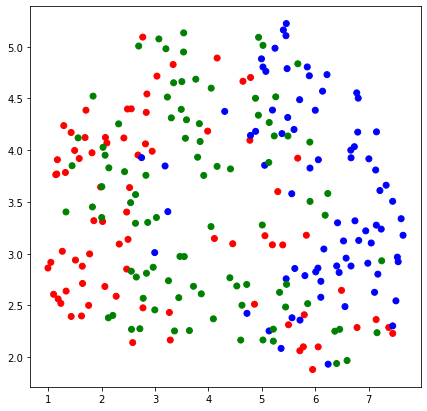

In [15]:
import umap

embs = umap.UMAP().fit_transform(torch.stack(mels))

plt.rcParams['figure.figsize'] = (7, 7)
plt.scatter(embs[:, 0], embs[:, 1], color=split(list(df['species'])))
plt.show()

Text(0.5, 1.0, '3 clusters')

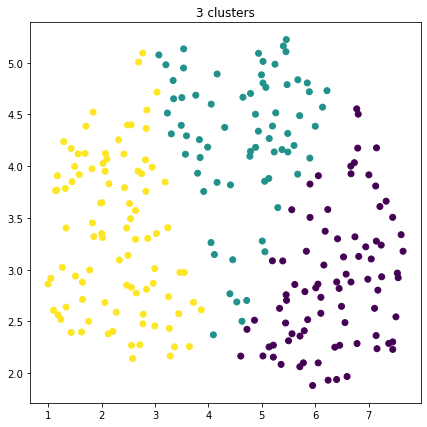

In [16]:
y_pred_3 = KMeans(n_clusters=3).fit_predict(embs)

plt.scatter(embs[:, 0], embs[:, 1], c=y_pred_3)
plt.title("3 clusters")

In [17]:
file = '486798-0.wav'

IPython.display.Audio('./wavfiles/' + file)

In [18]:
most_sim = get_most_similar(file, files)

IPython.display.Audio('./wavfiles/' + most_sim)

c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
